<a href="https://www.kaggle.com/code/xxmohamedadelxx/credit-card-fraud-81-recall?scriptVersionId=263429343" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Install Dependencies

In [1]:
!pip install --upgrade --force-reinstall numpy==1.24.4 scikit-learn==1.3.2 imbalanced-learn==0.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 39.1 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Succ

# **Data exploration**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# checking for null values

data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# checking for duplicates and if so remove them -> redundant transactions

data.duplicated().sum()

1081

In [10]:
data.drop_duplicates(inplace=True)

<Axes: xlabel='Class', ylabel='count'>

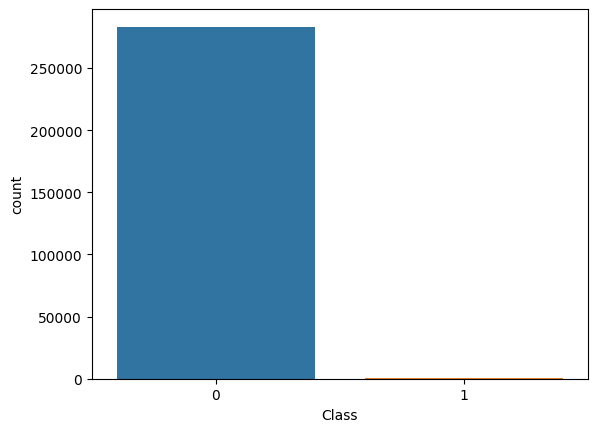

In [11]:
sns.countplot(x=data['Class'])

In [12]:
data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [13]:
# determine the % of each class

percent_0 = np.round((((data[data['Class'] == 0].shape[0] ) / len(data) ) * 100 ) , 2)
percent_1 = np.round((((data[data['Class'] == 1].shape[0] ) / len(data) ) * 100 ) , 2)

print("The % of class 0 is : {}% and of class 1 is : {}%".format(percent_0,percent_1))

The % of class 0 is : 99.83% and of class 1 is : 0.17%


**Conclusion**
1. There are no "Null" values, so we don't have to work on ways to replace values.
2. Most of the transactions were Non-Fraud (99.83%) of the time, while Fraud transactions occurs (017%) of the time -> severe imbalance.
3. The description of the data says that all the features went through a PCA transformation (except Time & Amount). -> need to scale them to match other features.


# **EDA**

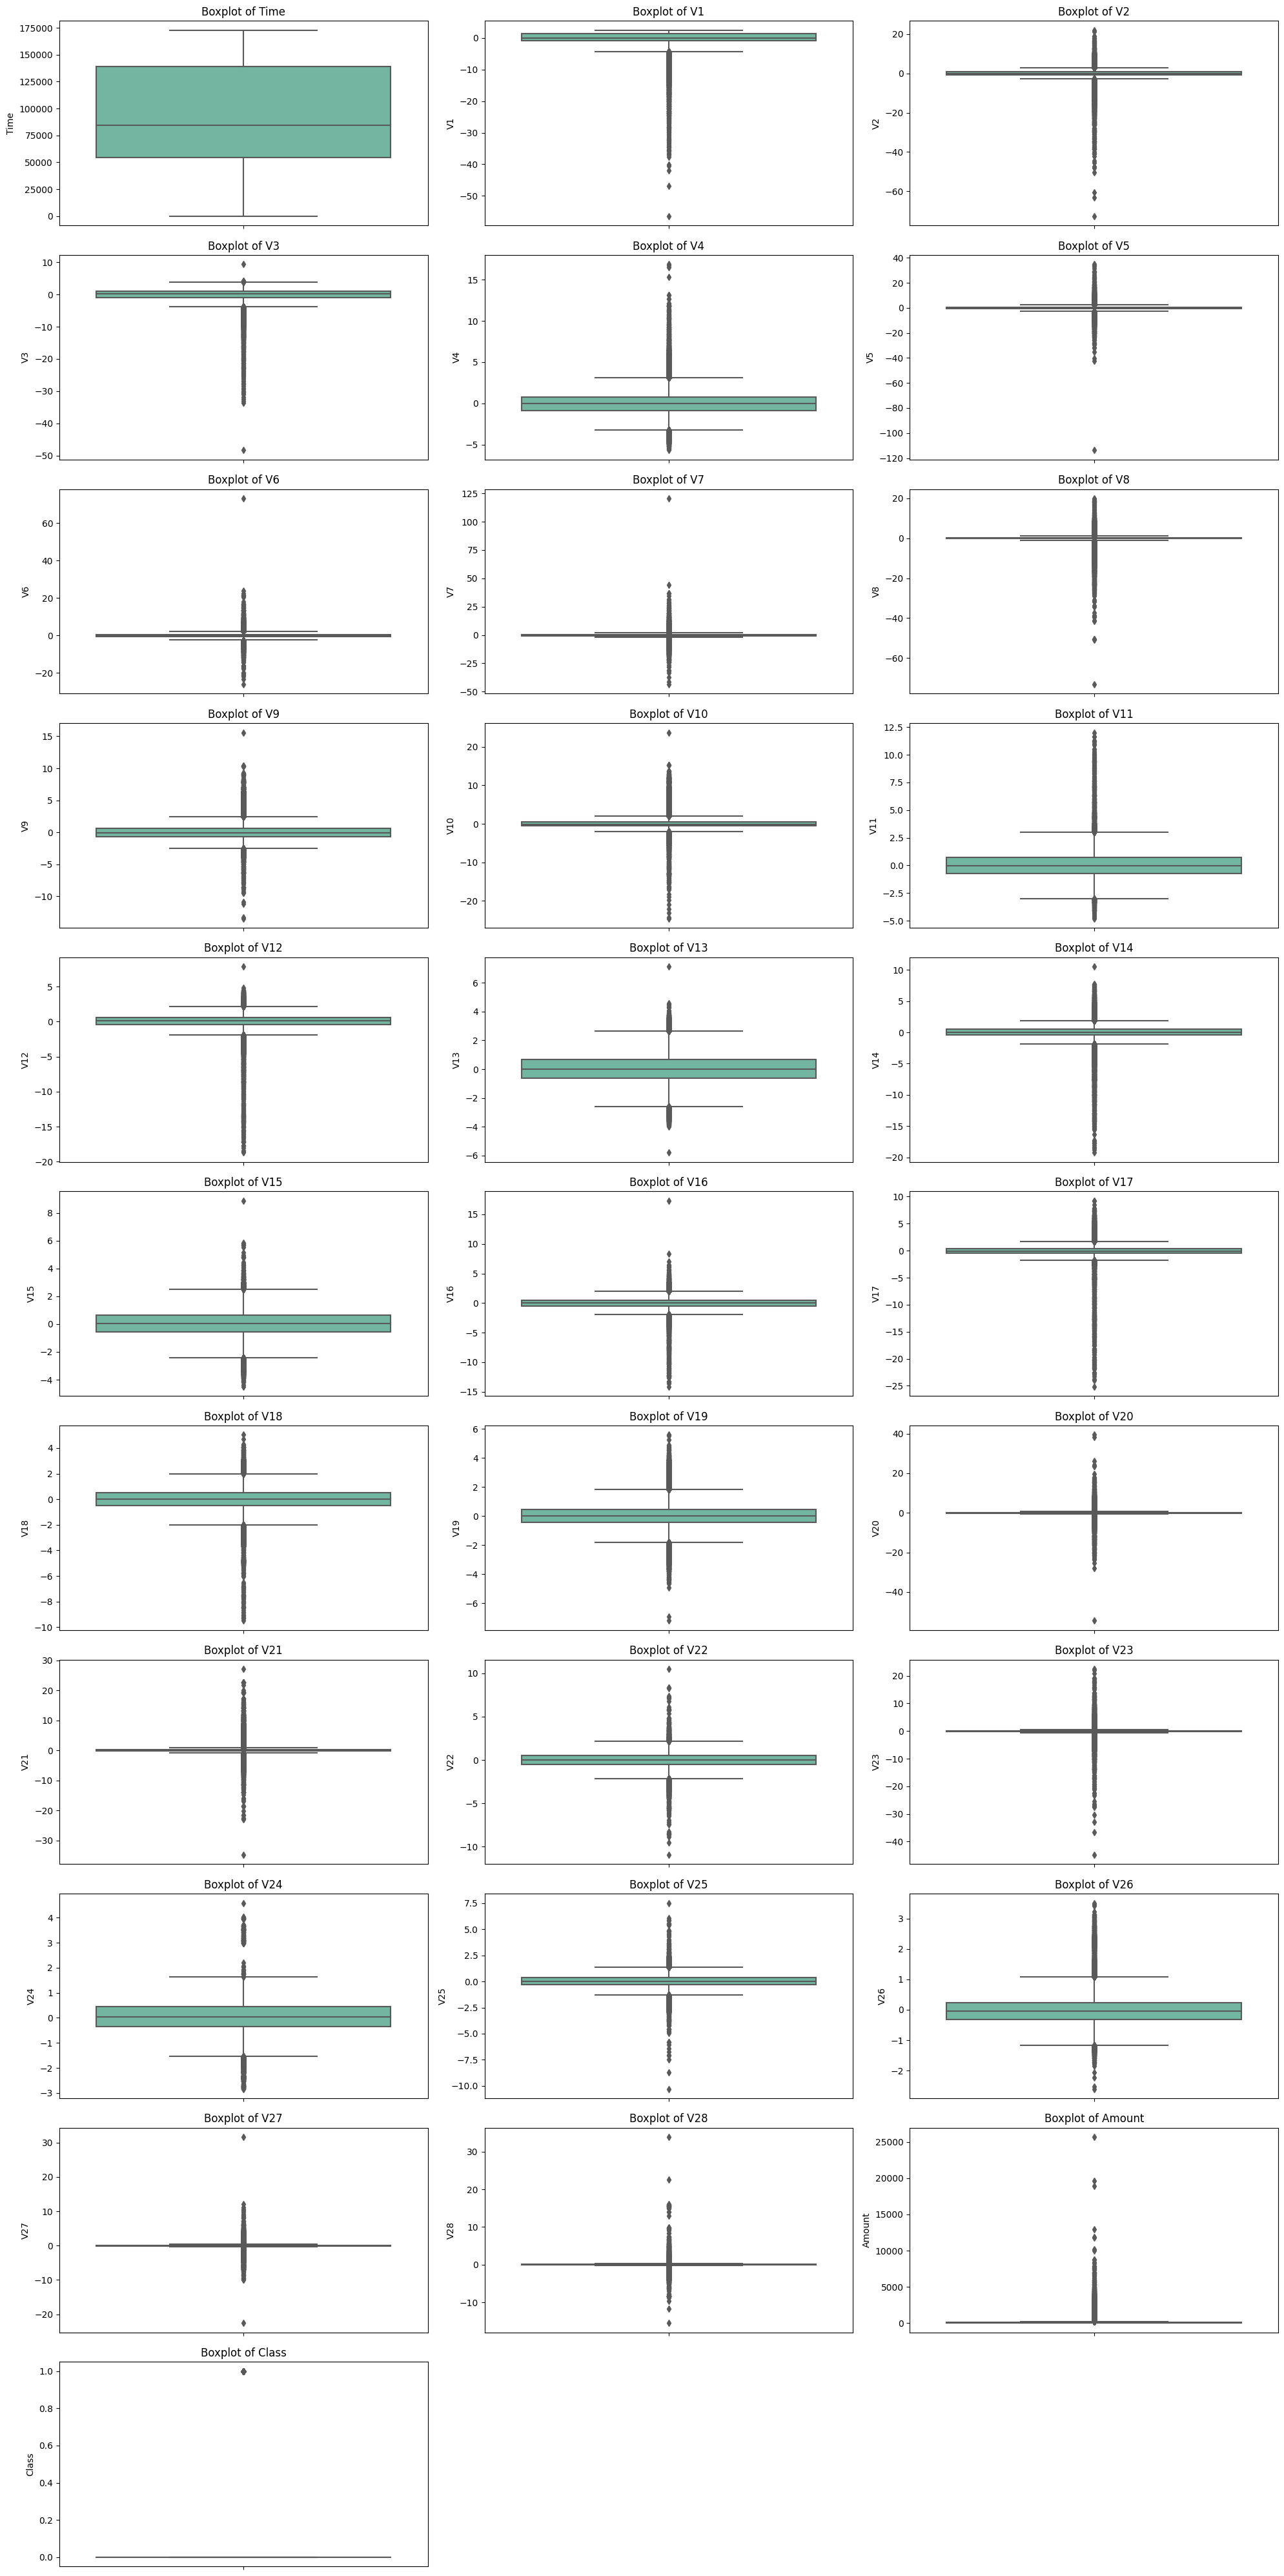

In [14]:
# check data distribution for each feature

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 40))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)  
    sns.boxplot(data=data, y=col, palette="Set2")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

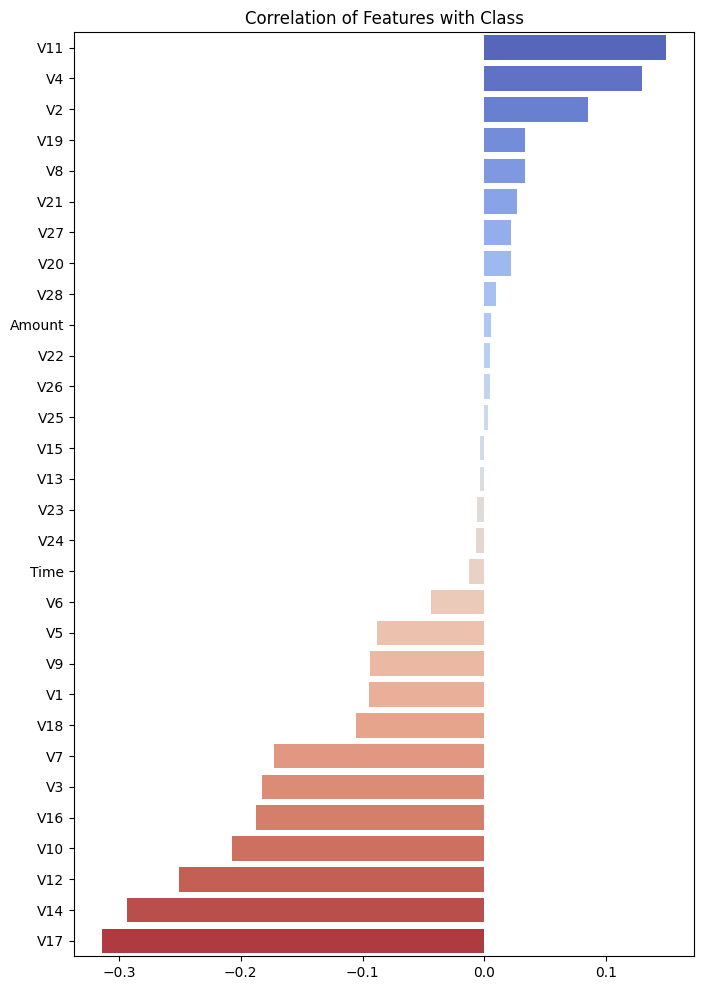

In [15]:
# lets check correlation with our target

corr = data.corr()
class_corr = corr["Class"].sort_values(ascending=False)

# Exclude the Class correlation with itself
class_corr = class_corr.drop("Class")

plt.figure(figsize=(8,12))
sns.barplot(x=class_corr.values, y=class_corr.index, palette="coolwarm")
plt.title("Correlation of Features with Class")
plt.show()

In [16]:
# From the dataset describtion we got that

# 1- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset
# 2- The feature 'Amount' is the transaction Amount

data['Time'].sort_values(ascending=True)

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284805    172788.0
284804    172788.0
284806    172792.0
Name: Time, Length: 283726, dtype: float64

In [17]:
# Since Time is in seconds, dividing by 3600 converts it into hours.
# and np.floor() ensures that any number is rounded into the exact hour -> 1.7 : 1 || 2.9 : 2

data['hour']  = data['Time'].apply(lambda x: np.floor(x / 3600))


# Out of curiosity i wanted to know the time span of the data
# so if we got the max and last hour and divide by 24 hours we will approx. get the no. of days
# where these transactions were made

time_span = data['hour'].max() / 24
display(np.round(time_span),2)

# So in 2 days we got 284,807 transactions with 492 of them where fraud

2.0

2

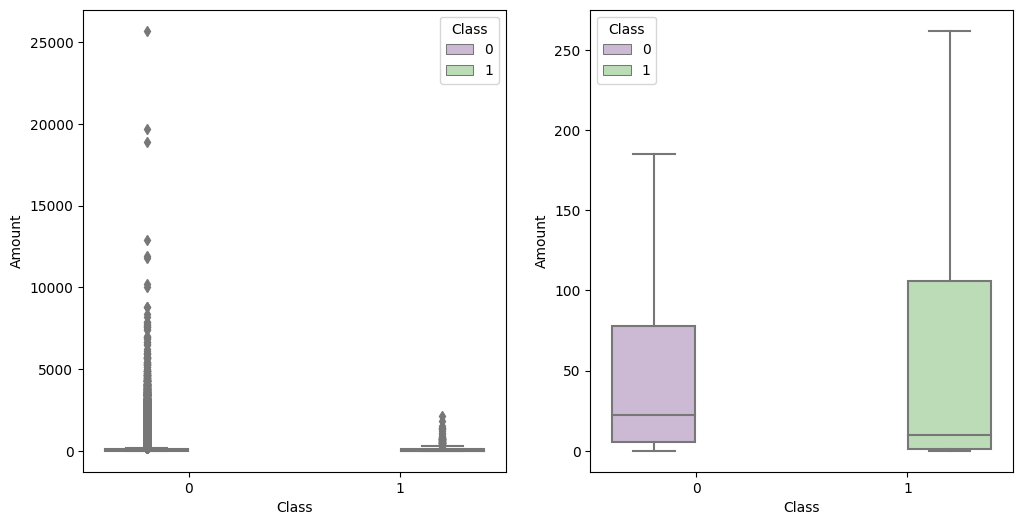

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data, palette="PRGn",showfliers=False)
plt.show();

Both fraud and non-fraud classes contain extreme values → outliers exist.

Non-fraud has more extreme high-value outliers, but most are clustered at low amounts.

Fraud shows greater variance in the typical range, suggesting fraudsters don’t follow a consistent spending pattern — sometimes very low “test” amounts, sometimes larger attempts.

# Data preparation

By now we know that our dataset is heavily imbalanced 

Also that our objective is to capture all/most fraudulent transactions -> we will use : Recall , AUC-PR , Confusion Matrix as our evaluation metrics



Right now we need to subsample our dataset (**StratifiedKFold sampling**) so that we can see different techniques to handle data imbalance and what works best

In [19]:
# we will loop through and create a sample each time 
# using a diff random_state so that each sample is different

from sklearn.model_selection import train_test_split

# number of subsamples we want
num_subsamples = 3

# fraction of the dataset to use (10% in our case)
subsample_fraction = 0.1 

subsample_dfs = []

# loop
for seed in range(num_subsamples):
    subsample, _ = train_test_split(
        data,
        train_size=subsample_fraction,
        stratify=data['Class'],  # preserve class ratio
        random_state=seed
    )
    subsample_dfs.append(subsample)

# Now each subsample is in its own DataFrame
for i, df in enumerate(subsample_dfs, 1):
    print(f"Subsample {i} shape: {df.shape}")
    print(df['Class'].value_counts(normalize=True))
    print("---")

Subsample 1 shape: (28372, 32)
Class
0    0.998343
1    0.001657
Name: proportion, dtype: float64
---
Subsample 2 shape: (28372, 32)
Class
0    0.998343
1    0.001657
Name: proportion, dtype: float64
---
Subsample 3 shape: (28372, 32)
Class
0    0.998343
1    0.001657
Name: proportion, dtype: float64
---


In [20]:
# now we have created 3 random samples that we can experiment on

df1 = subsample_dfs[0]
df2 = subsample_dfs[1]
df3 = subsample_dfs[2]

display(df1.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hour
240831,150768.0,2.004049,-0.126083,-1.015564,0.315375,-0.117863,-0.858307,0.052326,-0.153371,0.312141,...,-0.567920,0.347738,0.011137,-0.363285,0.179185,-0.072927,-0.070321,1.98,0,41.0
79744,58158.0,-1.226016,0.295123,0.914254,-2.500106,-1.550448,-0.767521,-0.819561,0.765812,-2.539936,...,-0.417145,-0.203359,-0.191002,0.450744,-0.262156,-0.339907,-0.084621,25.00,0,16.0
137063,81998.0,1.214869,0.153900,0.471481,0.578215,-0.350816,-0.537929,-0.056965,-0.031874,0.135585,...,-0.681390,0.172816,0.051809,0.123059,0.126229,-0.016819,0.014435,2.69,0,22.0
265365,161855.0,-0.927803,-0.429627,2.664290,-1.566012,-0.578086,0.395327,-0.296690,0.099220,-0.466370,...,0.063048,-0.115606,0.751141,0.249626,0.701727,0.102061,-0.072609,71.50,0,44.0
152581,97414.0,1.903652,-0.557706,0.104126,0.388452,-0.808847,0.088968,-1.044309,0.102238,2.423711,...,0.100699,0.244268,-0.437002,-0.608523,0.444146,-0.048345,-0.052945,39.00,0,27.0


# Experimental sample no. 1

we will see Random forest classifier after and before applying SMOTE sampling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,roc_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [22]:
# Split features and target
X_1 = df1.drop("Class", axis=1)
y_1 = df1["Class"]

# Train/test split (keep class ratio)
X_train, X_test, y_train, y_test = \
train_test_split(
    X_1, y_1, test_size=0.2, stratify=y_1, random_state=42)

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a baseline model
base_model = RandomForestClassifier(class_weight='balanced', random_state=42)
base_model.fit(X_train_scaled, y_train)
y_train_pred_base = base_model.predict(X_train_scaled)

# Imbalance-handling: SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Train model after SMOTE 
smote_model = RandomForestClassifier(random_state=42)
smote_model.fit(X_train_res, y_train_res)
y_train_pred_smote = smote_model.predict(X_train_scaled)



# Predict on test set
y_pred_base = base_model.predict(X_test_scaled)
y_pred_smote = smote_model.predict(X_test_scaled)



# Evaluate metrics
print("Baseline - Train set:")
print(classification_report(y_train, y_train_pred_base, target_names=["Non-Fraud", "Fraud"]))
print("Baseline - Test set:")
print(classification_report(y_test, y_pred_base, target_names=["Non-Fraud", "Fraud"]))

print("SMOTE - Train set:")
print(classification_report(y_train, y_train_pred_smote, target_names=["Non-Fraud", "Fraud"]))
print("SMOTE - Test set:")
print(classification_report(y_test, y_pred_smote, target_names=["Non-Fraud", "Fraud"]))

Baseline - Train set:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     22659
       Fraud       1.00      1.00      1.00        38

    accuracy                           1.00     22697
   macro avg       1.00      1.00      1.00     22697
weighted avg       1.00      1.00      1.00     22697

Baseline - Test set:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00      5666
       Fraud       1.00      0.67      0.80         9

    accuracy                           1.00      5675
   macro avg       1.00      0.83      0.90      5675
weighted avg       1.00      1.00      1.00      5675

SMOTE - Train set:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     22659
       Fraud       1.00      1.00      1.00        38

    accuracy                           1.00     22697
   macro avg       1.00      1.00      1.00     22697
weighted avg

**Conclusion**

1. We didnt need scaling for tree-based models however it is needed for SMOTE as it uses distance-measuring

2. RandomForest is slightly overfitting the minority class.


3. This is typical for tree ensembles on extremely imbalanced datasets.



4. SMOTE improves test recall slightly (0.78 vs 0.67) → helps reduce overfitting effects.

# Experimental sample no. 2

In [23]:
# Split features and target
X_2 = df2.drop("Class", axis=1)
y_2 = df2["Class"]

# Train/test split (keep class ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X_2, y_2, test_size=0.2, stratify=y_1, random_state=42
)

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_train_res_tomek, y_train_res_tomek = smote_tomek.fit_resample(X_train_scaled, y_train)

tomek_model = RandomForestClassifier(random_state=42)
tomek_model.fit(X_train_res_tomek, y_train_res_tomek)
y_train_pred_tomek = tomek_model.predict(X_train_scaled)
y_pred_tomek = tomek_model.predict(X_test_scaled)



# SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_res_enn, y_train_res_enn = smote_enn.fit_resample(X_train_scaled, y_train)

enn_model = RandomForestClassifier(random_state=42)
enn_model.fit(X_train_res_enn, y_train_res_enn)
y_train_pred_enn = enn_model.predict(X_train_scaled)
y_pred_enn = enn_model.predict(X_test_scaled)



# Evaluate metrics
print("SMOTETomek - Train set:")
print(classification_report(y_train, y_train_pred_tomek, target_names=["Non-Fraud", "Fraud"]))
print("SMOTETomek - Test set:")
print(classification_report(y_test, y_pred_tomek, target_names=["Non-Fraud", "Fraud"]))

print("SMOTEENN - Train set:")
print(classification_report(y_train, y_train_pred_enn, target_names=["Non-Fraud", "Fraud"]))
print("SMOTEENN - Test set:")
print(classification_report(y_test, y_pred_enn, target_names=["Non-Fraud", "Fraud"]))

SMOTETomek - Train set:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     22661
       Fraud       1.00      1.00      1.00        36

    accuracy                           1.00     22697
   macro avg       1.00      1.00      1.00     22697
weighted avg       1.00      1.00      1.00     22697

SMOTETomek - Test set:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00      5664
       Fraud       0.90      0.82      0.86        11

    accuracy                           1.00      5675
   macro avg       0.95      0.91      0.93      5675
weighted avg       1.00      1.00      1.00      5675

SMOTEENN - Train set:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     22661
       Fraud       0.92      1.00      0.96        36

    accuracy                           1.00     22697
   macro avg       0.96      1.00      0.98     22697
weigh

**Conclusion**


1. SMOTEENN seems to generalize slightly better than all other techniques.

2. Based on these results, the next experiment could focus on Trying other models

# Experimental sample no. 3

In [24]:
# we will use the samples created by SMOTEENN before 
# X_train_res_enn, y_train_res_enn

models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
}

for name, model in models.items():
    # Train on resampled training set
    model.fit(X_train_res_enn, y_train_res_enn)
    
    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Metrics
    print(f"\n===== {name} =====")
    print(classification_report(y_test, y_test_pred, target_names=["Non-Fraud", "Fraud"]))


===== RandomForest =====
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00      5664
       Fraud       0.91      0.91      0.91        11

    accuracy                           1.00      5675
   macro avg       0.95      0.95      0.95      5675
weighted avg       1.00      1.00      1.00      5675


===== XGBoost =====
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00      5664
       Fraud       0.77      0.91      0.83        11

    accuracy                           1.00      5675
   macro avg       0.88      0.95      0.92      5675
weighted avg       1.00      1.00      1.00      5675

[LightGBM] [Info] Number of positive: 22661, number of negative: 22630
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7905
[LightGBM] [Info] Number of data

**Conclusion**

RandomForest wins overall -> we will use it on full dataset & hypertune it for best results

# **Modeling**

In [25]:
X = data.drop('Class', axis=1)
y = data['Class']                


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)



scaler = StandardScaler()

X_train[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])

X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

In [26]:
# SMOTEENN

smote_enn = SMOTEENN(random_state=42,n_jobs=-1)
X_train_res, y_train_res = smote_enn.fit_resample(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/imblearn/over_sampling/_smote/base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [27]:
# RandomForestClassifier

enn_model = RandomForestClassifier(random_state=42, class_weight="balanced", n_jobs=-1)
enn_model.fit(X_train_res, y_train_res)

y_pred_enn = enn_model.predict(X_test) 

# Evaluate metrics
print(classification_report(y_test, y_pred_enn, target_names=["Non-Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56651
       Fraud       0.89      0.78      0.83        95

    accuracy                           1.00     56746
   macro avg       0.95      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746



In [28]:
from sklearn.metrics import f1_score

y_proba = enn_model.predict_proba(X_test)[:, 1]

best_thresh, best_f1 = 0.5, 0
for t in np.linspace(0.1, 0.9, 50):
    y_pred_t = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)
    if f1 > best_f1:
        best_f1, best_thresh = f1, t

print(f"Best threshold: {best_thresh:.2f}, F1 = {best_f1:.3f}")

Best threshold: 0.44, F1 = 0.846


In [29]:
# ---> Lower threshold → more Fraud detected → higher recall, lower precision.

threshold = 0.44
y_pred_thresh = (y_proba >= threshold).astype(int)

print(classification_report(y_test, y_pred_thresh, target_names=["Non-Fraud", "Fraud"]))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56651
       Fraud       0.89      0.81      0.85        95

    accuracy                           1.00     56746
   macro avg       0.94      0.91      0.92     56746
weighted avg       1.00      1.00      1.00     56746

ROC AUC: 0.9491770944722487


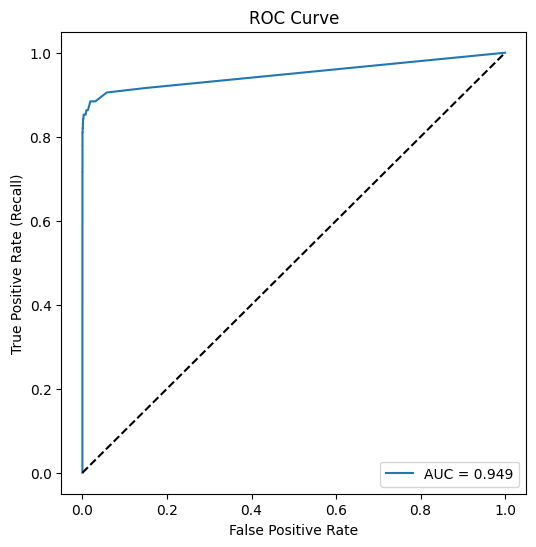

In [30]:
# Plot ROC curve & compute AUC


# Fraud = positive class (1)
y_proba = enn_model.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=1)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [31]:
# lets try XGBOOST


# Compute imbalance ratio
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train_res, y_train_res)
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_xgb, target_names=["Non-Fraud","Fraud"]))
print("ROC AUC:", roc_auc_score(y_test, y_proba_xgb))

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56651
       Fraud       0.33      0.81      0.47        95

    accuracy                           1.00     56746
   macro avg       0.66      0.90      0.73     56746
weighted avg       1.00      1.00      1.00     56746

ROC AUC: 0.9586410422448064


# **Final Conclusion**

In this project, we tackled the highly imbalanced Credit Card Fraud Detection problem using resampling techniques and ensemble models. The dataset contained ~284,000 transactions, with only 0.17% labeled as fraud — making class imbalance the core challenge.

Our main findings:

- Resampling with SMOTEENN improved the representation of the minority class and allowed models to learn fraud patterns more effectively.

- Random Forest achieved a strong balance between precision (0.89) and recall (0.81) for fraud detection, resulting in an F1-score of 0.846. This means the model detects most fraudulent transactions while minimizing false alarms.

- XGBoost recall (0.81) but at the cost of much lower precision (0.33).

- Adjusting the decision threshold had a large impact on results, highlighting the importance of tuning based on business needs (e.g., prioritizing recall vs precision).

### **Overall, our experiments show that there is no single “best” model, but rather a trade-off depending on the cost of false negatives (missed frauds) versus false positives (false alarms). In real-world deployment, combining models or adding post-processing rules could further improve robustness.**